In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score

veri_seti = "Images"  # Veri setinizin yolunu buraya girin

# Klasörleri alfabetik olarak sıralama
klasorler = sorted([klasor for klasor in os.listdir(veri_seti) if os.path.isdir(os.path.join(veri_seti, klasor))])

print("Sınıf\t\tResim Sayısı")
print("------------------------")

# Klasörlerdeki resim sayılarını bulma ve yazdırma
resim_sayilari = []
toplam = 0
for klasor in klasorler:
    klasor_yolu = os.path.join(veri_seti, klasor)
    resimler = [dosya for dosya in os.listdir(klasor_yolu) if dosya.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    resim_sayisi = len(resimler)
    print(f" {klasor}\t\t {resim_sayisi}")
    resim_sayilari.append(resim_sayisi)
    toplam += resim_sayisi

print(f"\nToplam resim sayısı: {toplam} ve sınıf sayısı: {len(klasorler)}")

2023-12-20 16:00:27.540929: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 16:00:28.218172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 16:00:28.218430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 16:00:28.339587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 16:00:28.566673: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 16:00:28.569820: I tensorflow/core/platform/cpu_feature_guard.cc:1

Sınıf		Resim Sayısı
------------------------
 A		 104
 B		 104
 C		 101
 D		 99
 E		 104
 F		 101
 G		 103
 H		 104
 I		 104
 J		 104
 K		 104
 L		 104
 M		 103
 N		 104
 O		 104
 P		 104
 R		 104
 S		 104
 T		 96
 U		 104
 V		 86
 Y		 104
 Z		 104

Toplam resim sayısı: 2353 ve sınıf sayısı: 23


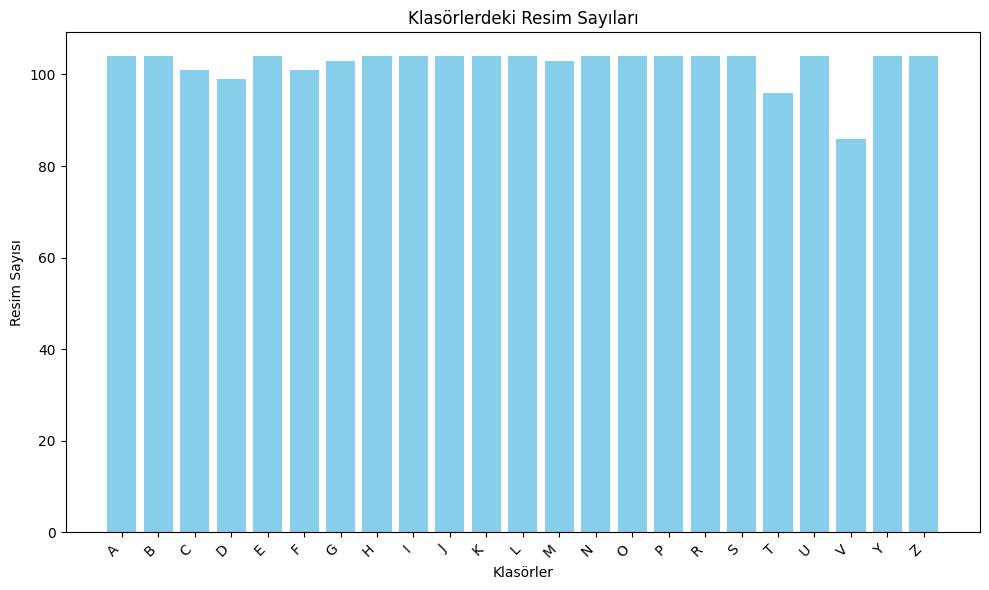

In [2]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(klasorler)), resim_sayilari, tick_label=klasorler, color='skyblue')
plt.xlabel('Klasörler')
plt.ylabel('Resim Sayısı')
plt.title('Klasörlerdeki Resim Sayıları')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
veri_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

train_veri = veri_generator.flow_from_directory(
    veri_seti,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training',   
    seed=42  
)

test_veri = veri_generator.flow_from_directory(
    veri_seti,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  
    seed=42  
)

Found 1899 images belonging to 23 classes.
Found 456 images belonging to 23 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_veri.class_indices), activation='softmax')
])

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_veri, epochs=10, validation_data=test_veri, steps_per_epoch=len(train_veri), validation_steps=len(test_veri))

Epoch 1/10


2023-12-20 16:00:43.494287: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25189632 exceeds 10% of free system memory.


 1/60 [..............................] - ETA: 5:29 - loss: 3.1260 - accuracy: 0.0312

2023-12-20 16:00:44.149121: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25189632 exceeds 10% of free system memory.


 2/60 [>.............................] - ETA: 35s - loss: 3.1647 - accuracy: 0.0312 

2023-12-20 16:00:44.797717: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25189632 exceeds 10% of free system memory.


 3/60 [>.............................] - ETA: 36s - loss: 3.1599 - accuracy: 0.0208

2023-12-20 16:00:45.473759: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25189632 exceeds 10% of free system memory.


 4/60 [=>............................] - ETA: 35s - loss: 3.1536 - accuracy: 0.0312

2023-12-20 16:00:46.072521: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25189632 exceeds 10% of free system memory.


60/60 [==============================] - 47s 702ms/step - loss: 3.0797 - accuracy: 0.0669 - val_loss: 2.7641 - val_accuracy: 0.1711
Epoch 2/10
60/60 [==============================] - 41s 674ms/step - loss: 2.5054 - accuracy: 0.2227 - val_loss: 2.3038 - val_accuracy: 0.2895
Epoch 3/10
60/60 [==============================] - 39s 653ms/step - loss: 2.0638 - accuracy: 0.3360 - val_loss: 2.1683 - val_accuracy: 0.3311
Epoch 4/10
60/60 [==============================] - 39s 648ms/step - loss: 1.7808 - accuracy: 0.4323 - val_loss: 1.8774 - val_accuracy: 0.3925
Epoch 5/10
60/60 [==============================] - 39s 653ms/step - loss: 1.6344 - accuracy: 0.4671 - val_loss: 1.7010 - val_accuracy: 0.4518
Epoch 6/10
60/60 [==============================] - 40s 656ms/step - loss: 1.5291 - accuracy: 0.5118 - val_loss: 1.5320 - val_accuracy: 0.4912
Epoch 7/10
60/60 [==============================] - 39s 652ms/step - loss: 1.4426 - accuracy: 0.5424 - val_loss: 1.5120 - val_accuracy: 0.5307
Epoch 8/10

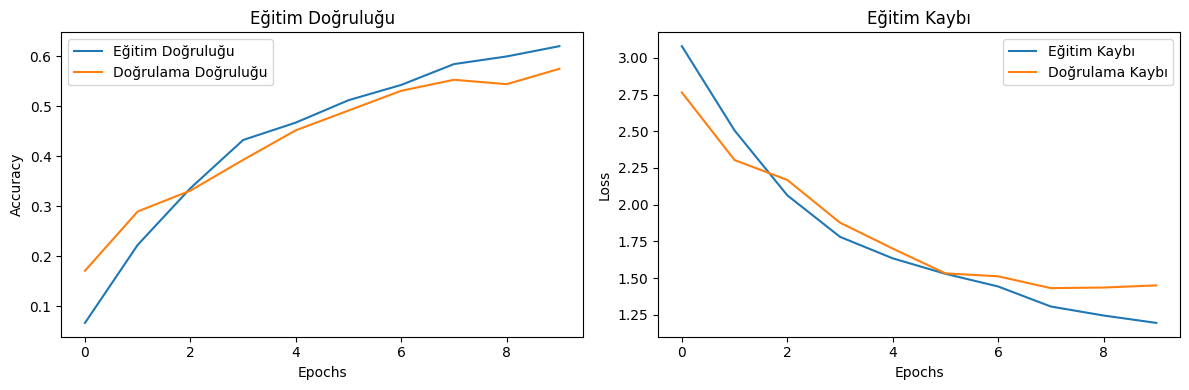

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
model.save("nadam10_lr001_dropout.keras")

In [7]:
predictions = model.predict(test_veri, steps=len(test_veri))
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_veri.classes
class_labels = list(test_veri.class_indices.keys())

15/15 [==============================] - 5s 298ms/step


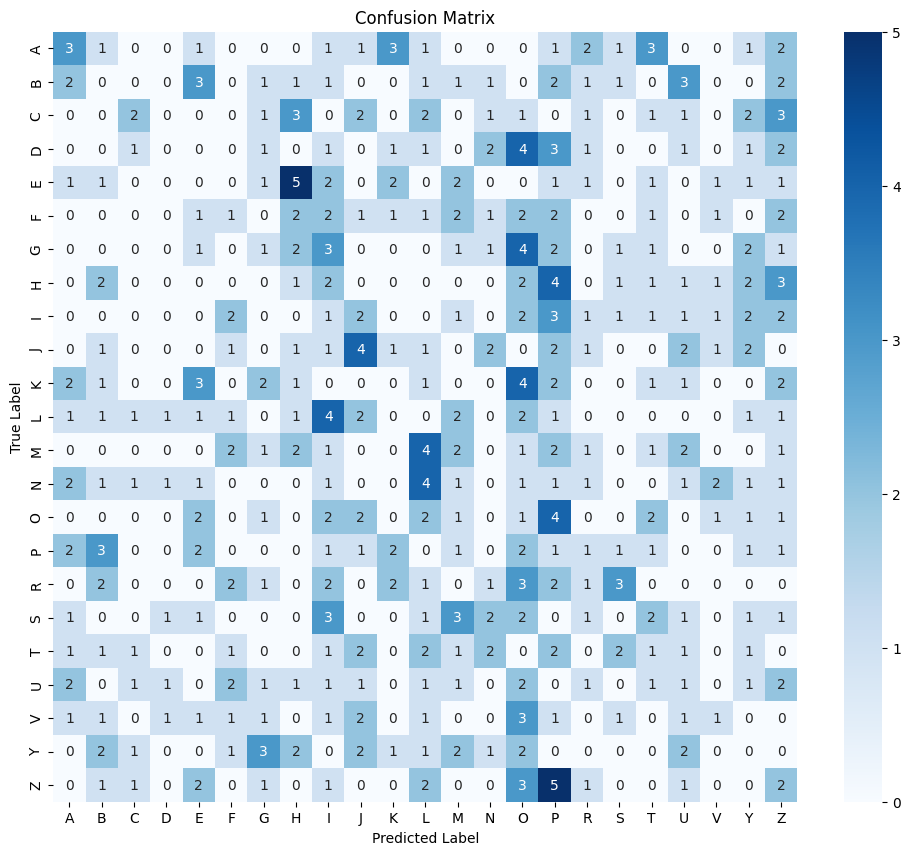

In [8]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=klasorler, yticklabels=klasorler)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [9]:
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=1)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.17      0.14      0.15        21
           B       0.00      0.00      1.00        20
           C       0.22      0.10      0.14        20
           D       0.00      0.00      1.00        19
           E       0.00      0.00      1.00        20
           F       0.07      0.05      0.06        20
           G       0.06      0.05      0.06        20
           H       0.05      0.05      0.05        20
           I       0.03      0.05      0.04        20
           J       0.18      0.20      0.19        20
           K       0.00      0.00      1.00        20
           L       0.00      0.00      1.00        20
           M       0.10      0.10      0.10        20
           N       0.00      0.00      1.00        20
           O       0.02      0.05      0.03        20
           P       0.02      0.05      0.03        20
           R       0.07      0.05      0.06        20
    

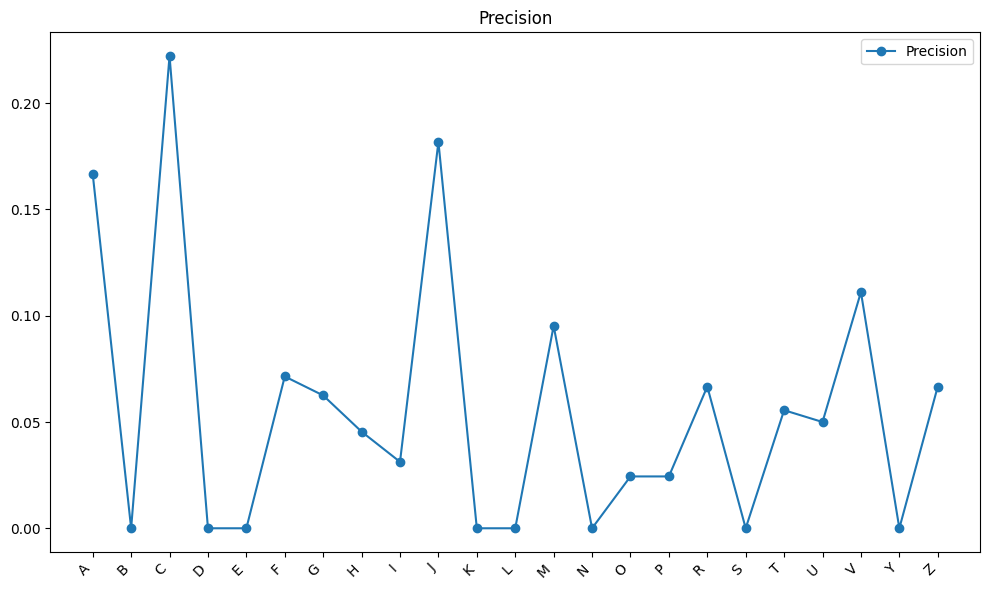

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, predicted_classes, average=None)

plt.figure(figsize=(10, 6))
plt.plot(klasorler, precision, marker='o', label='Precision')
plt.title('Precision')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

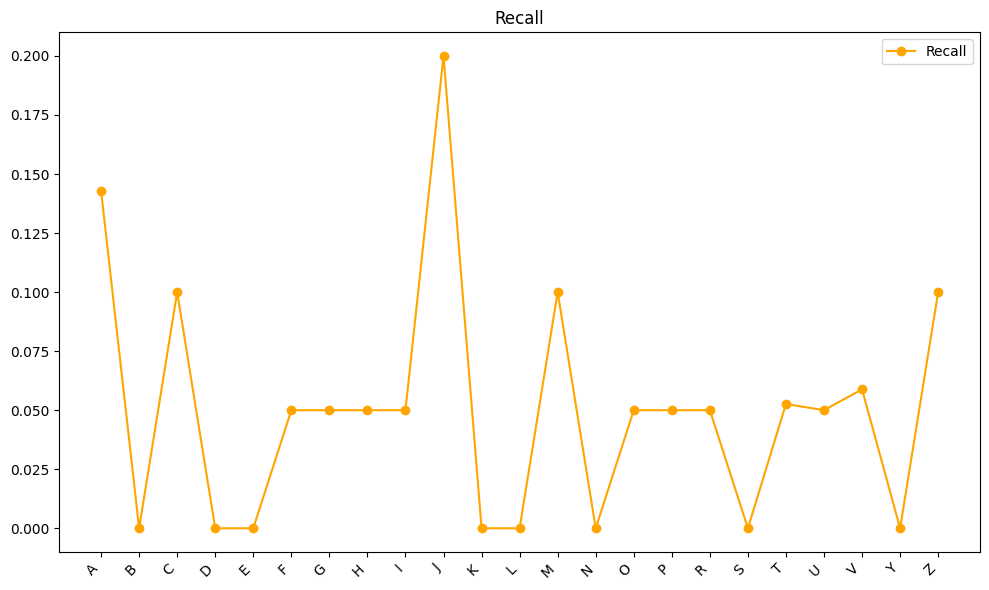

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

recall = recall_score(true_classes, predicted_classes, average=None)

plt.figure(figsize=(10, 6))
plt.plot(klasorler, recall, marker='o', color='orange', label='Recall')
plt.title('Recall')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

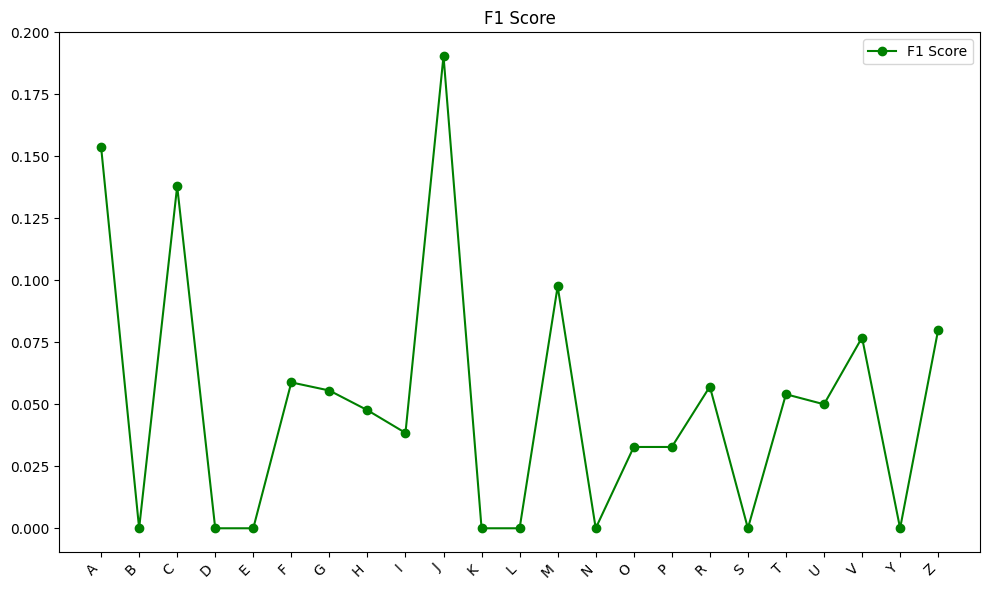

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1 = f1_score(true_classes, predicted_classes, average=None)

plt.figure(figsize=(10, 6))
plt.plot(klasorler, f1, marker='o', color='green', label='F1 Score')
plt.title('F1 Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

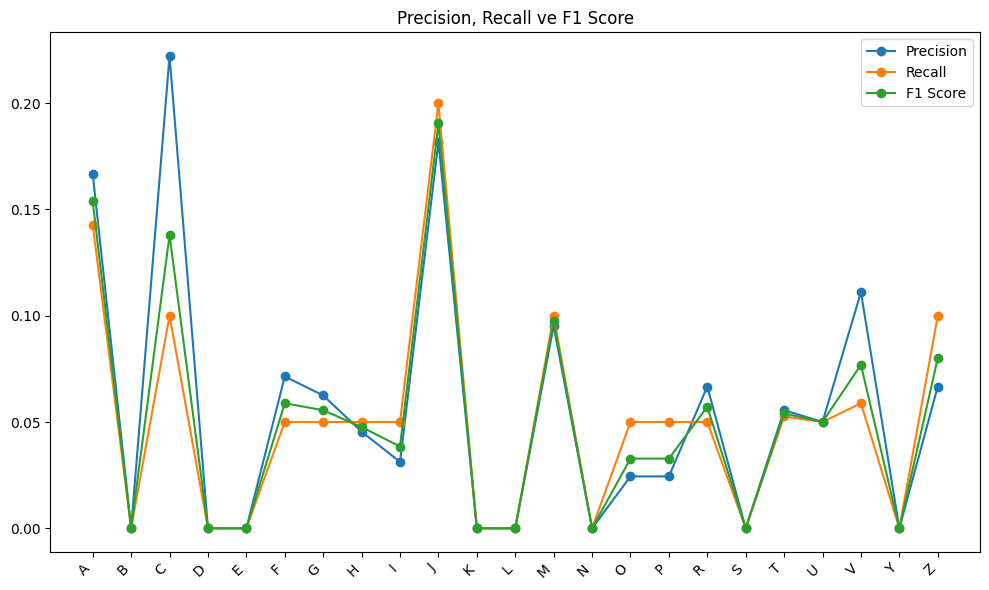

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_classes, predicted_classes, average=None)
recall = recall_score(true_classes, predicted_classes, average=None)
f1 = f1_score(true_classes, predicted_classes, average=None)

plt.figure(figsize=(10, 6))
plt.plot(klasorler, precision, marker='o', label='Precision')
plt.plot(klasorler, recall, marker='o', label='Recall')
plt.plot(klasorler, f1, marker='o', label='F1 Score')
plt.title('Precision, Recall ve F1 Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()